# B4 Bohr vibration-EXP2
by H cyan

huangzw29@mail2.sysu.edu.cn

2021.5.9

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.interpolate import Rbf
from scipy.optimize import curve_fit
from scipy.fftpack import fft, hilbert

## EXP2-1

In [2]:
table_2_1 = pd.DataFrame(columns=['phi', 'omega', 'T', 'frequency', 'beta'])
table_2_1.set_index('phi', drop=False, inplace=True)

In [21]:
df_2_1 = pd.read_csv(r'B4 data\EXP2\2-1 Damp4V Drive0V\EXP2-1.txt', sep='\t')
index_dic_2_1 = {13:70, 14:60, 15:50, 16:80, 17:90, 18:100}
for i in list(range(13, 19)):
    loc = i*7
    df = df_2_1.iloc[:, loc:loc+2]
    df = df.dropna()
    df.reset_index(drop=True, inplace=True)
    df.head(10)

    t_origin = np.array(df.iloc[:, 0])
    phi_origin = np.array(df.iloc[:, 1])

    def phi_t(t, A1, bt, omg, A4, A5):
        return A1 * np.exp(-bt*t) * np.cos(omg*t + A4) + A5


    popt, pcov = curve_fit(phi_t, t_origin, phi_origin)

    t_dense = np.linspace(t_origin.min(), t_origin.max(), 10000)

    phivals = phi_t(t_dense, popt[0], popt[1], popt[2], popt[3], popt[4])
    omega = popt[2]
    beta = popt[1]

    table_2_1.loc[index_dic_2_1[i]] = [index_dic_2_1[i], omega, 2*np.pi/omega, omega/(2*np.pi), beta]

    # Plot
    fig, a =  plt.subplots(3,1,figsize=(10, 20))

    a[0].plot(t_origin, phi_origin, linewidth=0.5, color='lightseagreen', label='Original curve')

    a[0].set_xlabel('time t/s')
    a[0].set_ylabel('angle phi/rad')
    a[0].set_title('(a) Original curve', y=-0.3)
    a[0].legend()


    a[1].plot(t_dense, phivals, color='deeppink', linewidth=0.5, label='Fitting curve')

    a[1].set_xlabel('time t/s')
    a[1].set_ylabel('angle phi/rad')
    a[1].set_title('(b) Fitting curve', y=-0.3)
    a[1].legend()


    a[2].plot(t_dense, phivals, color='deeppink', linewidth=0.5, label='Fitting curve')
    a[2].plot(t_origin, phi_origin, linewidth=0.5, color='lightseagreen', label='Original curve')


    a[2].set_xlabel('time t/s')
    a[2].set_ylabel('angle phi/rad')
    a[2].set_title('(c) Composite figure', y=-0.3)
    a[2].legend()

    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)
    plt.suptitle('Fig. 2.1.{} Damped vibration of the Bohr pendulum. Damp: 4V. Initial angle={} degree'.format(int(index_dic_2_1[i]/10-4), index_dic_2_1[i]), y=0.05, fontsize=16)

    # Output
    plt.savefig(r'B4 output\EXP2\2-1fig\fig.{}.png'.format(int(index_dic_2_1[i]/10-4)), bbox_inches = 'tight', dpi=600)
    plt.clf()

<Figure size 720x1440 with 0 Axes>

<Figure size 720x1440 with 0 Axes>

<Figure size 720x1440 with 0 Axes>

<Figure size 720x1440 with 0 Axes>

<Figure size 720x1440 with 0 Axes>

<Figure size 720x1440 with 0 Axes>

In [22]:
print(table_2_1)

       phi     omega         T  frequency      beta
phi                                                
70    70.0 -3.923071 -1.601599  -0.624376  0.039715
60    60.0  3.921987  1.602041   0.624204  0.045703
50    50.0  3.923042  1.601611   0.624372  0.049023
80    80.0  3.921112  1.602399   0.624064  0.038502
90    90.0  3.922037  1.602021   0.624212  0.036532
100  100.0  3.923480  1.601432   0.624441  0.035569


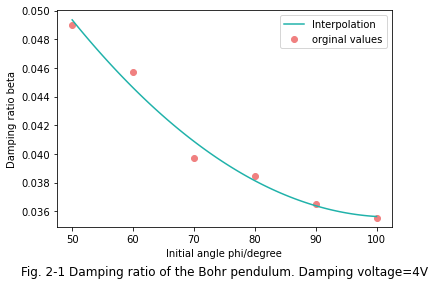

In [23]:
phi = table_2_1['phi']
beta1 = table_2_1['beta']
plt.scatter(phi, beta1, color='lightcoral', label='orginal values')

phinew = np.linspace(phi.min(), phi.max(),100)
func_smooth = np.polyfit(phi, beta1, deg=2) 
plt.plot(phinew, np.polyval(func_smooth, phinew), color='lightseagreen', label='Smooth')


plt.xticks(phi)
plt.xlabel('Initial angle phi/degree')
plt.ylabel('Damping ratio beta')
plt.title('Fig. 2-1 Damping ratio of the Bohr pendulum. Damping voltage=4V',y=-0.25)
plt.legend()

plt.savefig(r'B4 output\EXP2\2-1fig\Fig. 2-1 Damping ratio of the Bohr pendulum. Damping voltage=4V.png', bbox_inches = 'tight', dpi=600)

## EXP2-2

In [24]:
table_2_2 = pd.DataFrame(columns=['voltage', 'omega', 'T', 'frequency', 'beta'])
table_2_2.set_index('voltage', drop=False, inplace=True)

In [25]:
df_2_2 = pd.read_csv(r'B4 data\EXP2\2-2 Phi90degree\EXP2-2.txt', sep='\t')
index_dic_2_2 = {1:1, 2:2, 3:3, 4:5, 5:6, 6:7, 7:8, 8:9}
for i in list(range(1, 9)):
    loc = i*7
    df = df_2_2.iloc[:, loc:loc+2]
    df = df.dropna()
    df.reset_index(drop=True, inplace=True)
    df.head(10)

    t_origin = np.array(df.iloc[:, 0])
    phi_origin = np.array(df.iloc[:, 1])

    def phi_t(t, A1, bt, omg, A4, A5):
        return A1 * np.exp(-bt*t) * np.cos(omg*t + A4) + A5


    popt, pcov = curve_fit(phi_t, t_origin, phi_origin)

    t_dense = np.linspace(t_origin.min(), t_origin.max(), 10000)

    phivals = phi_t(t_dense, popt[0], popt[1], popt[2], popt[3], popt[4])
    omega = popt[2]
    beta = popt[1]

    table_2_2.loc[index_dic_2_2[i]] = [index_dic_2_2[i], omega, 2*np.pi/omega, omega/(2*np.pi), beta]

    # Plot
    fig, a =  plt.subplots(3,1,figsize=(10, 20))

    a[0].plot(t_origin, phi_origin, linewidth=0.5, color='lightseagreen', label='Original curve')

    a[0].set_xlabel('time t/s')
    a[0].set_ylabel('angle phi/rad')
    a[0].set_title('(a) Original curve', y=-0.3)
    a[0].legend()


    a[1].plot(t_dense, phivals, color='deeppink', linewidth=0.5, label='Fitting curve')

    a[1].set_xlabel('time t/s')
    a[1].set_ylabel('angle phi/rad')
    a[1].set_title('(b) Fitting curve', y=-0.3)
    a[1].legend()


    a[2].plot(t_dense, phivals, color='deeppink', linewidth=0.5, label='Fitting curve')
    a[2].plot(t_origin, phi_origin, linewidth=0.5, color='lightseagreen', label='Original curve')


    a[2].set_xlabel('time t/s')
    a[2].set_ylabel('angle phi/rad')
    a[2].set_title('(c) Composite figure', y=-0.3)
    a[2].legend()

    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)
    plt.suptitle('Fig. 2.2.{} Damped vibration of the Bohr pendulum. Angle: 90 degree. Damping voltage={} V'.format(i, index_dic_2_2[i]), y=0.05, fontsize=16)

    # Output
    plt.savefig(r'B4 output\EXP2\2-2fig\fig.{}.png'.format(i), bbox_inches = 'tight', dpi=600)
    plt.clf()

<Figure size 720x1440 with 0 Axes>

<Figure size 720x1440 with 0 Axes>

<Figure size 720x1440 with 0 Axes>

<Figure size 720x1440 with 0 Axes>

<Figure size 720x1440 with 0 Axes>

<Figure size 720x1440 with 0 Axes>

<Figure size 720x1440 with 0 Axes>

<Figure size 720x1440 with 0 Axes>

In [26]:
print(table_2_2)

         voltage     omega         T  frequency      beta
voltage                                                  
1            1.0  3.924777  1.600902   0.624648  0.016233
2            2.0  3.923176  1.601556   0.624393  0.021266
3            3.0 -3.922302 -1.601913  -0.624254  0.029836
5            5.0  3.923754  1.601320   0.624485  0.056169
6            6.0  3.925680  1.600534   0.624791  0.078571
7            7.0  3.924848  1.600873   0.624659  0.095001
8            8.0  3.922467  1.601845   0.624280  0.104969
9            9.0  3.923477  1.601433   0.624441  0.116333


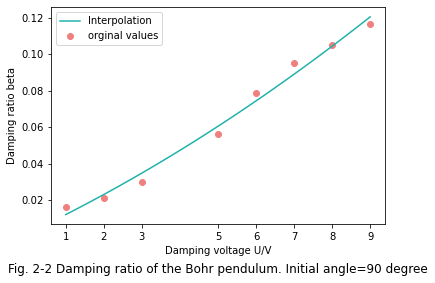

In [27]:
voltage = table_2_2['voltage']
beta2 = table_2_2['beta']
plt.scatter(voltage, beta2, color='lightcoral', label='orginal values')

voltagenew = np.linspace(voltage.min(), voltage.max(),100)
func_smooth = np.polyfit(voltage, beta2, deg=2) 
plt.plot(voltagenew, np.polyval(func_smooth, voltagenew), color='lightseagreen', label='Smooth')


plt.xticks(voltage)
plt.xlabel('Damping voltage U/V')
plt.ylabel('Damping ratio beta')
plt.title('Fig. 2-2 Damping ratio of the Bohr pendulum. Initial angle=90 degree',y=-0.25)
plt.legend()

plt.savefig(r'B4 output\EXP2\2-2fig\Fig. 2-2 Damping ratio of the Bohr pendulum. Initial angle = 90 degree.png', bbox_inches = 'tight', dpi=600)